In [0]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [0]:
## Hyper-parameters

input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

In [0]:
## Toy dataset

X_train = np.array([[3.3], [4.4], [5.5], [6.71],
                    [6.93], [4.168], [9.779], [6.182],
                    [7.59], [2.167], [7.042], [10.791],
                    [5.313], [7.997], [3.1]],
                   dtype = np.float32)

Y_train = np.array([[1.7], [2.76], [2.09], [3.19],
                    [1.694], [1.573], [3.366], [2.596],
                    [2.53], [1.221], [2.827], [3.465],
                    [1.65], [2.904], [1.3]],
                   dtype = np.float32)

In [0]:
## Linear regression model

model = nn.Linear(input_size, output_size)

In [0]:
## Loss and optimizer

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), 
                            lr = learning_rate)

In [6]:
## Train the model

for epoch in range(num_epochs):
  ## Convert numpy arrays to torch tensors
  inputs = torch.from_numpy(X_train)
  targets = torch.from_numpy(Y_train)
  
  ## Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)
  
  ## Backward and optimize
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  
  if (epoch + 1) % 5 == 0:
    print ('Epoch [{} / {}], Loss: {:.4f}'.format(epoch + 1, num_epochs, loss.item()))

Epoch [5 / 60], Loss: 6.4155
Epoch [10 / 60], Loss: 2.8522
Epoch [15 / 60], Loss: 1.4083
Epoch [20 / 60], Loss: 0.8229
Epoch [25 / 60], Loss: 0.5854
Epoch [30 / 60], Loss: 0.4888
Epoch [35 / 60], Loss: 0.4493
Epoch [40 / 60], Loss: 0.4329
Epoch [45 / 60], Loss: 0.4258
Epoch [50 / 60], Loss: 0.4226
Epoch [55 / 60], Loss: 0.4209
Epoch [60 / 60], Loss: 0.4198


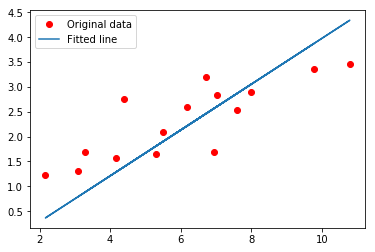

In [7]:
## Plot the graph

predicted = model(torch.from_numpy(X_train)).detach().numpy()
plt.plot(X_train, Y_train, 'ro', label = 'Original data')
plt.plot(X_train, predicted, label = 'Fitted line')
plt.legend()
plt.show()

In [0]:
## Save the model checkpoint

torch.save(model.state_dict(), 'model.ckpt')